#Predict Mortality Rate 
##Submitted by: ARNAB DEY
### Multiple Linear Regression


#Reading the csv file

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cancer = pd.read_csv('/cancer_reg 2.csv')

#Understanding the csv file

In [ ]:
cancer.shape 

(3047, 34)

In [ ]:
cancer.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

Drpping the catagorial variable colums

In [ ]:
cancer = cancer.drop(["Geography","binnedInc"], axis =1)

In [ ]:
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


#Missing value treatment

In [ ]:
cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

Replaceing 'NaN' values with mean

In [ ]:
cancer['PctSomeCol18_24'].replace(np.NaN,cancer['PctSomeCol18_24'].mean())
cancer['PctEmployed16_Over'].replace(np.NaN,cancer['PctEmployed16_Over'].mean())
cancer['PctPrivateCoverageAlone'].replace(np.NaN,cancer['PctPrivateCoverageAlone'].mean())

0       48.453774
1       53.800000
2       43.500000
3       40.300000
4       43.900000
          ...    
3042    54.900000
3043    53.300000
3044    52.600000
3045    56.300000
3046    60.300000
Name: PctPrivateCoverageAlone, Length: 3047, dtype: float64

Filling the missing values with mean.

In [ ]:
cancer['PctSomeCol18_24'] = cancer['PctSomeCol18_24'].fillna(cancer['PctSomeCol18_24'].mean())
cancer['PctEmployed16_Over'] = cancer['PctEmployed16_Over'].fillna(cancer['PctEmployed16_Over'].mean())
cancer['PctPrivateCoverageAlone'] = cancer['PctPrivateCoverageAlone'].fillna(cancer['PctPrivateCoverageAlone'].mean())

In [ ]:
cancer.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

#Visualisation of data

In [ ]:
cancer.corr()  #Finding correlation of the data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,-0.122844,0.064788,-0.106108,-0.143327,-0.182054,0.070159,0.284176,-0.311375,0.321021,0.197981,-0.009016,0.132244,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,-0.144069,0.086161,-0.181029,-0.136794,-0.151418,0.063322,0.259761,-0.295929,0.293210,0.125015,0.069701,0.056183,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,0.012048,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,0.112065,0.355123,-0.289383,-0.190006,0.101864,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,0.109940,-0.160463,-0.126582,-0.151821,0.065207,0.248375,-0.311849,0.297463,0.139571,0.050768,0.052677,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,-0.004071,-0.038143,-0.090387,-0.057035,0.032604,0.063819,-0.085128,0.108594,0.087669,-0.031957,0.092545,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,-0.031944,0.046372,0.006178,0.050574,-0.009180,-0.016909,0.036587,-0.020352,-0.023598,0.018590,0.004665,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,-0.343189,0.449986,0.100486,0.241310,-0.134864,-0.034135,0.318277,-0.131599,-0.161204,-0.142737,0.082232,-0.147824,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


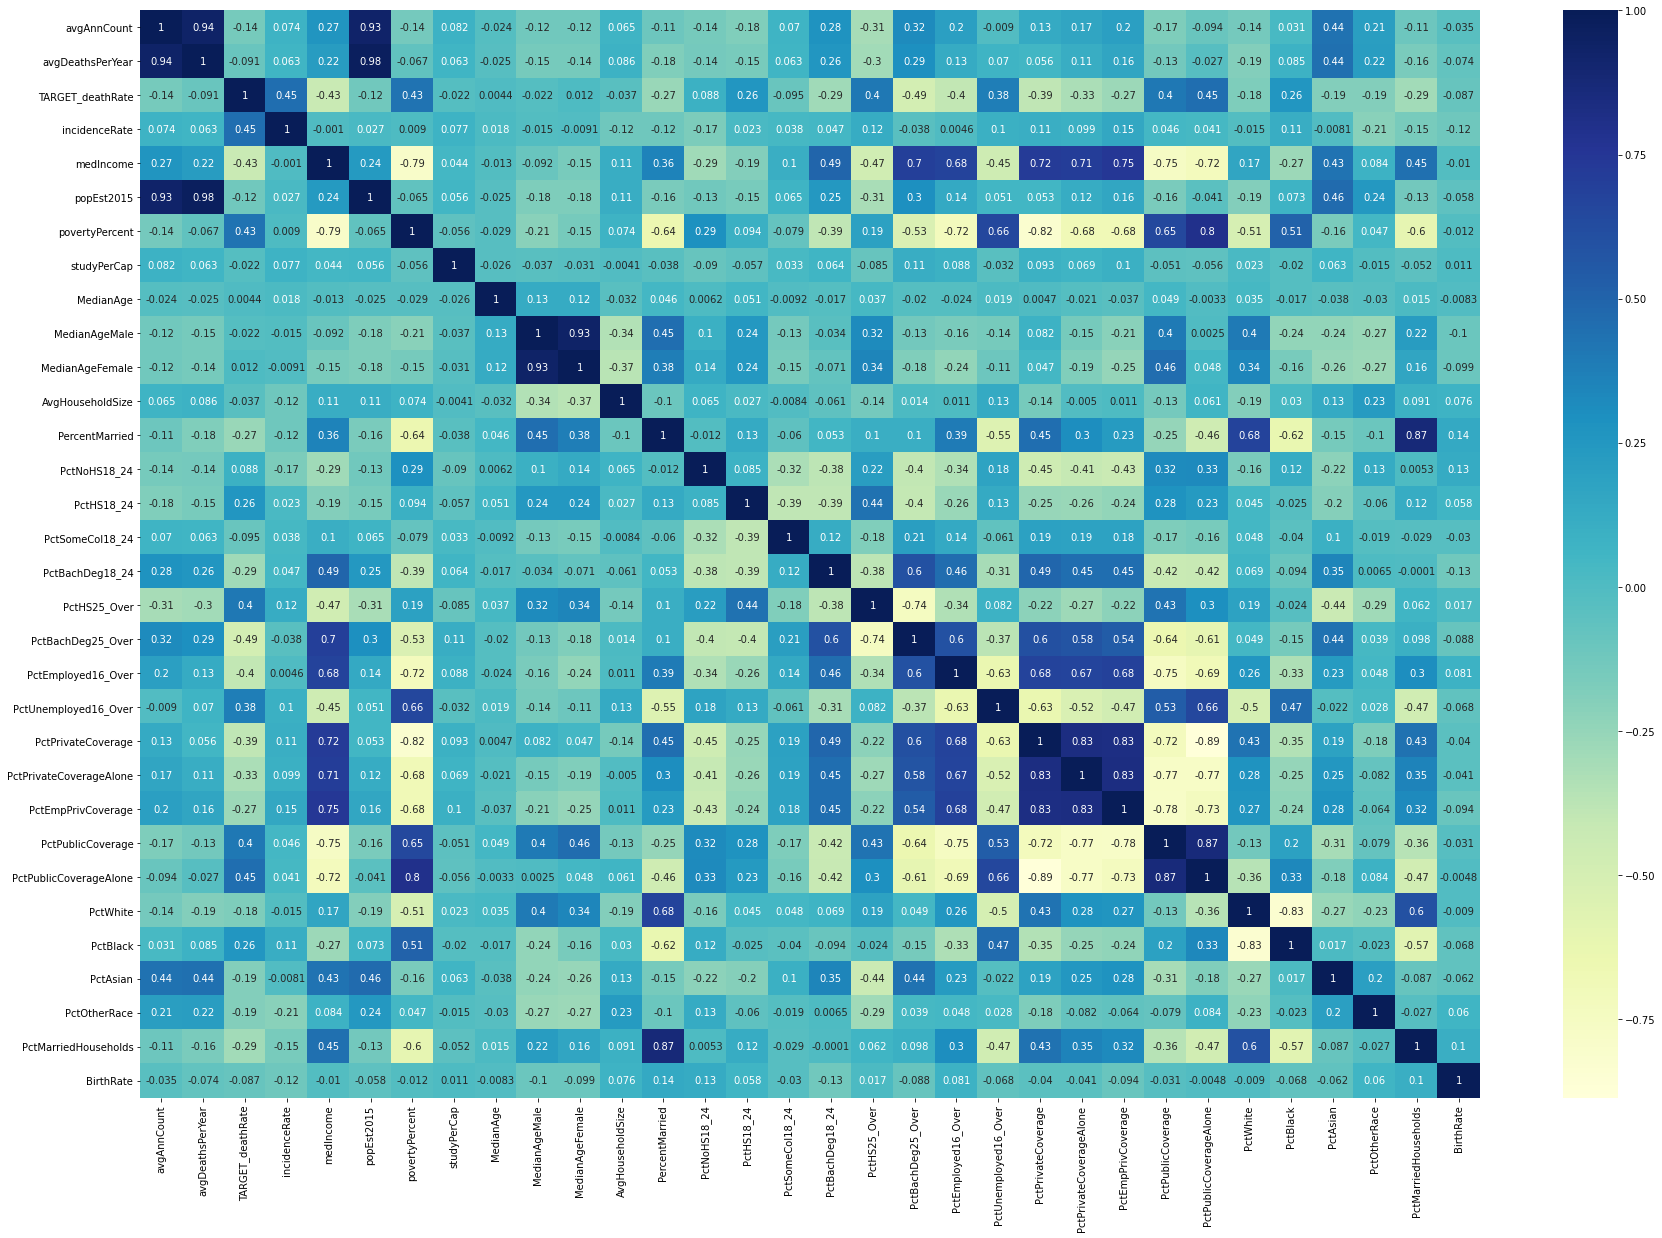

In [ ]:
plt.figure(figsize = (30,20))
sns.heatmap(cancer.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can use the columns which have good corealation with the dependent variable 'TARGET_deathRate'

#Univariate Analysis
We can see the outliers with univariate analysis of the columns.

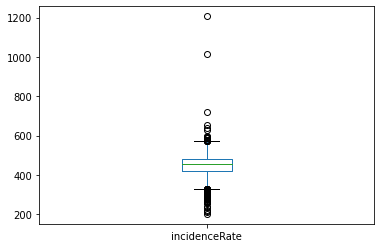

In [ ]:
cancer['incidenceRate'].plot.box()

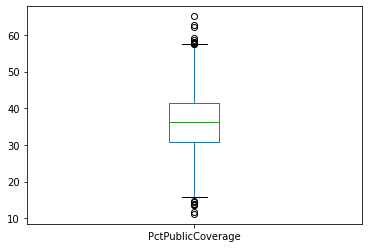

In [ ]:
cancer['PctPublicCoverage'].plot.box()

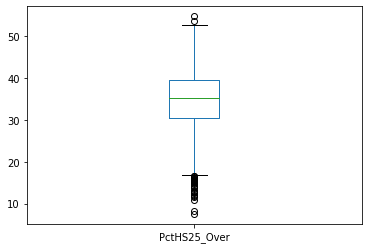

In [ ]:
cancer['PctHS25_Over'].plot.box()

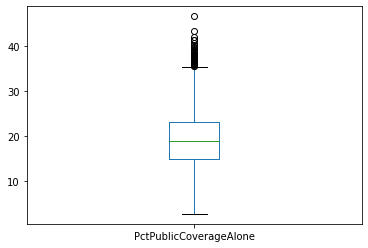

In [ ]:
cancer['PctPublicCoverageAlone'].plot.box()

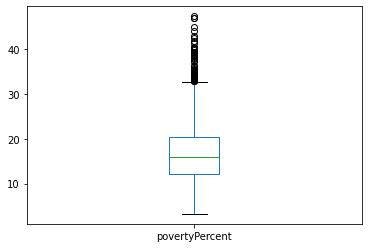

In [ ]:
cancer['povertyPercent'].plot.box()

#Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


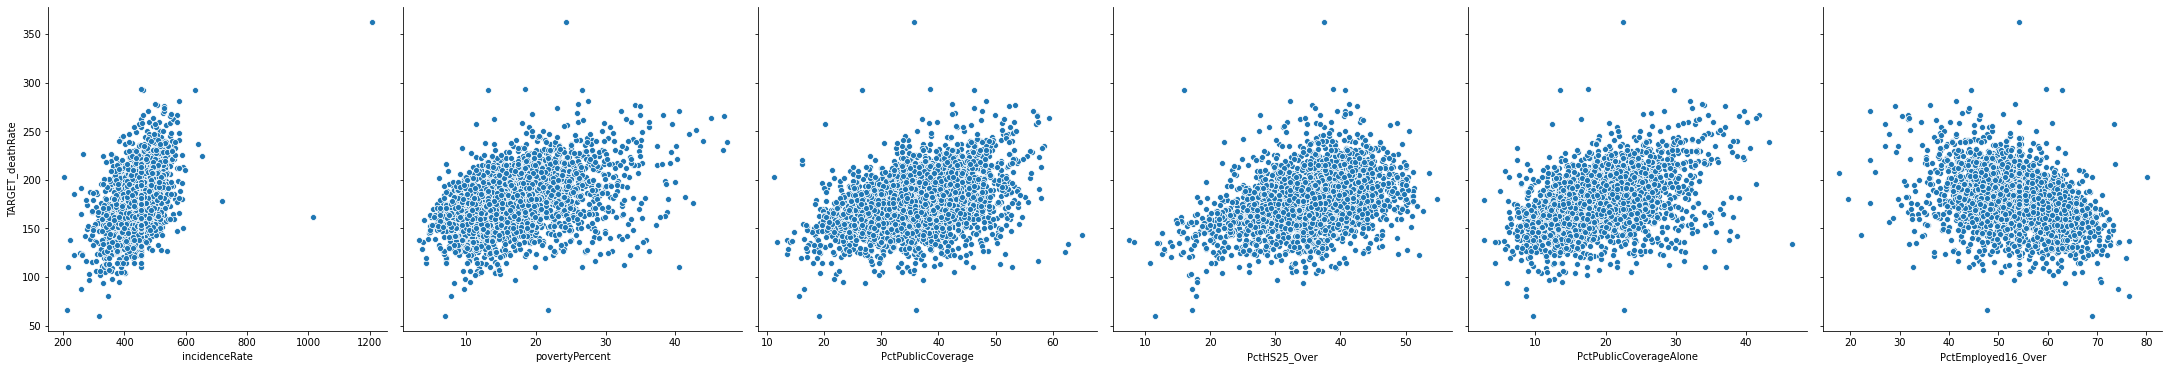

In [ ]:
import seaborn as sns
sns.pairplot(cancer, x_vars=['incidenceRate', 'povertyPercent', 'PctPublicCoverage','PctHS25_Over','PctPublicCoverageAlone','PctEmployed16_Over'], y_vars='TARGET_deathRate',size=5, aspect=1, kind='scatter')
plt.show()

#Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cancer, train_size = 0.7, test_size = 0.3, random_state = 100)

#Rescaling the Features
Using MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = df_train.columns # all the columns 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3008,0.005873,0.005926,0.345567,0.313246,0.197738,0.003327,0.310680,0.040772,0.031401,0.371158,0.442396,0.597254,0.589069,0.355694,0.213846,0.471169,0.110039,0.626932,0.226913,0.632000,0.254355,0.652244,0.515957,0.526902,0.513915,0.389920,0.911816,0.023985,0.021062,0.083673,0.479597,0.289798
2196,0.004483,0.005354,0.425509,0.271281,0.325497,0.003160,0.155340,0.000000,0.029607,0.368794,0.400922,0.680843,0.672065,0.255850,0.429231,0.471169,0.137066,0.761589,0.189974,0.652800,0.195122,0.745192,0.677305,0.688312,0.319109,0.275862,0.964110,0.008592,0.005121,0.016186,0.668582,0.291243
1666,0.008101,0.010423,0.385901,0.221659,0.238068,0.005737,0.257282,0.008582,0.034093,0.399527,0.476959,0.625117,0.564777,0.140406,0.506154,0.471169,0.102317,0.766004,0.189974,0.660800,0.240418,0.732372,0.492088,0.675325,0.413729,0.336870,0.894681,0.039455,0.008265,0.079210,0.481470,0.258444
2319,0.000603,0.000643,0.202035,0.161695,0.228638,0.000451,0.230583,0.000000,0.030863,0.390071,0.414747,0.630183,0.838057,0.371295,0.552308,0.471169,0.044402,0.677704,0.345646,0.584842,0.090592,0.711538,0.583333,0.474954,0.398887,0.305040,0.955298,0.005485,0.024495,0.046582,0.716270,0.451959
918,0.001730,0.001571,0.246730,0.245426,0.393356,0.001920,0.186893,0.000000,0.014175,0.191489,0.177419,0.739102,0.848178,0.400936,0.538462,0.471169,0.028958,0.611479,0.224274,0.635200,0.156794,0.735577,0.742908,0.753247,0.161410,0.137931,0.900626,0.001996,0.011722,0.041640,0.776392,0.469535


#Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

#Building our model
Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#RFE
Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', False, 5),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 8),
 ('studyPerCap', False, 22),
 ('MedianAge', False, 15),
 ('MedianAgeMale', False, 16),
 ('MedianAgeFemale', False, 4),
 ('AvgHouseholdSize', False, 17),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 18),
 ('PctHS18_24', False, 9),
 ('PctSomeCol18_24', False, 19),
 ('PctBachDeg18_24', False, 21),
 ('PctHS25_Over', False, 3),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', False, 2),
 ('PctUnemployed16_Over', False, 13),
 ('PctPrivateCoverage', False, 6),
 ('PctPrivateCoverageAlone', False, 20),
 ('PctEmpPrivCoverage', False, 10),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 11),
 ('PctBlack', False, 12),
 ('PctAsian', False, 14),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 7)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015',
       'PercentMarried', 'PctBachDeg25_Over', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24',
       'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctWhite', 'PctBlack',
       'PctAsian', 'BirthRate'],
      dtype='object')

#Building model using statsmodel

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          8.28e-301
Time:                        16:33:47   Log-Likelihood:                 2609.3
No. Observations:                2132   AIC:                            -5197.
Df Residuals:                    2121   BIC:                            -5134.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

'popEst2015' and 'PercentMarried' are insignificant as p value > 0.05

In [ ]:
X_train_new = X_train_rfe.drop(["popEst2015"], axis = 1)

In [ ]:
X_train_new = X_train_new.drop(["PercentMarried"], axis = 1)

Rebuilding the model

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     252.7
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          8.40e-302
Time:                        16:33:48   Log-Likelihood:                 2606.0
No. Observations:                2132   AIC:                            -5194.
Df Residuals:                    2123   BIC:                            -5143.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 3),
 ('studyPerCap', False, 17),
 ('MedianAge', False, 10),
 ('MedianAgeMale', False, 11),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 12),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 13),
 ('PctHS18_24', False, 4),
 ('PctSomeCol18_24', False, 14),
 ('PctBachDeg18_24', False, 16),
 ('PctHS25_Over', True, 1),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', False, 8),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 15),
 ('PctEmpPrivCoverage', False, 5),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 6),
 ('PctBlack', False, 7),
 ('PctAsian', False, 9),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 2)]

In [ ]:
col1 = X_train.columns[rfe.support_]
col1

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'MedianAgeFemale', 'PercentMarried', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

**After deleting those two insignificant colums r squre value did't affect much.**

#Building the model with 15 independent variable

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col1]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     144.5
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          2.68e-310
Time:                        16:33:48   Log-Likelihood:                 2644.6
No. Observations:                2132   AIC:                            -5257.
Df Residuals:                    2116   BIC:                            -5167.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
X_train_rfe.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'MedianAgeFemale', 'PercentMarried',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctPrivateCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train_new.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'MedianAgeFemale', 'PercentMarried', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,PctPublicCoverage,208.56
6,PercentMarried,147.09
14,PctMarriedHouseholds,127.77
12,PctPublicCoverageAlone,118.67
10,PctPrivateCoverage,91.79
9,PctEmployed16_Over,73.44
5,MedianAgeFemale,62.88
7,PctHS25_Over,45.59
1,avgDeathsPerYear,38.27
4,popEst2015,31.01


#Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_deathRate = lm.predict(X_train_rfe)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

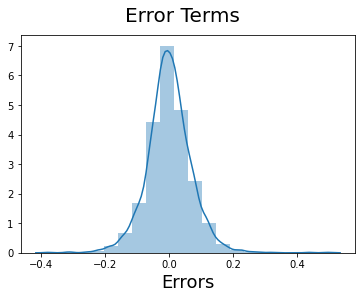

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_deathRate), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

#Making Predictions
##Applying scalling on the test dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = df_test.columns # all the columns 
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
147,0.050100,0.040548,0.398507,0.647887,0.785351,0.027475,0.033937,0.007021,0.035161,0.627273,0.630499,0.652971,0.758105,0.278057,0.411034,0.485666,0.374690,0.321353,0.673418,0.780702,0.206767,0.931429,0.911392,0.944056,0.142276,0.102273,0.900471,0.033493,0.101810,0.034455,0.808241,0.236181
2304,0.000276,0.000588,0.389174,0.192185,0.094979,0.000401,0.443439,0.000000,0.028495,0.518182,0.489736,0.642839,0.431421,0.460637,0.211034,0.485666,0.066998,0.820296,0.040506,0.580702,0.203008,0.482857,0.444620,0.402098,0.550813,0.534091,0.367473,0.724585,0.000000,0.025955,0.365021,0.148039
962,0.001728,0.002155,0.528698,0.472967,0.193223,0.000803,0.187783,0.000000,0.040660,0.696970,0.727273,0.526318,0.693267,0.095477,0.664828,0.485666,0.022333,0.663848,0.250633,0.722807,0.210526,0.750000,0.488924,0.428322,0.365854,0.163636,0.933667,0.044448,0.000000,0.003555,0.496242,0.449944
821,0.012577,0.017042,0.681288,0.511586,0.085074,0.010347,0.599548,0.000000,0.005832,0.103030,0.117302,0.642839,0.192020,0.207705,0.202759,0.761905,0.374690,0.427061,0.458228,0.592982,0.432331,0.587143,0.566456,0.562937,0.341463,0.347727,0.491790,0.530649,0.050251,0.028673,0.282507,0.239368
221,0.006910,0.008031,0.661689,0.674466,0.135454,0.003272,0.477376,0.000000,0.029328,0.551515,0.565982,0.000811,0.384040,0.447236,0.554483,0.485666,0.000000,0.625793,0.197468,0.426316,0.390977,0.527143,0.409810,0.386364,0.621951,0.497727,0.519159,0.513261,0.015894,0.029381,0.430659,0.410121


##Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('TARGET_deathRate')
X_test = df_test

In [ ]:
X_train_rfe.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'MedianAgeFemale', 'PercentMarried',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctPrivateCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [ ]:
X_train_new.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'MedianAgeFemale', 'PercentMarried', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

#Model Evaluation

Text(0, 0.5, 'y_pred')

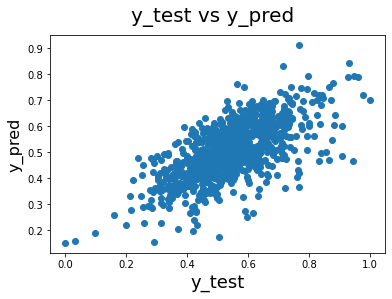

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label